<a href="https://colab.research.google.com/github/depresssed-kid/delivery-time/blob/main/delivery_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import OrdinalEncoder, OneHotEncoder
import pandas as pd
import seaborn as sns

In [ ]:
time = pd.read_csv('Food_Delivery_Times.csv')
time.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [ ]:
time.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [ ]:
time['Weather'] = time['Weather'].fillna(time['Weather'].mode()[0])
time['Traffic_Level'] = time['Traffic_Level'].fillna(time['Traffic_Level'].mode()[0])
time['Time_of_Day'] = time['Time_of_Day'].fillna(time['Time_of_Day'].mode()[0])
time['Courier_Experience_yrs'] = time['Courier_Experience_yrs'].fillna(time['Courier_Experience_yrs'].median())
time.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


array([[<Axes: title={'center': 'Order_ID'}>,
        <Axes: title={'center': 'Distance_km'}>],
       [<Axes: title={'center': 'Preparation_Time_min'}>,
        <Axes: title={'center': 'Courier_Experience_yrs'}>],
       [<Axes: title={'center': 'Delivery_Time_min'}>, <Axes: >]],
      dtype=object)

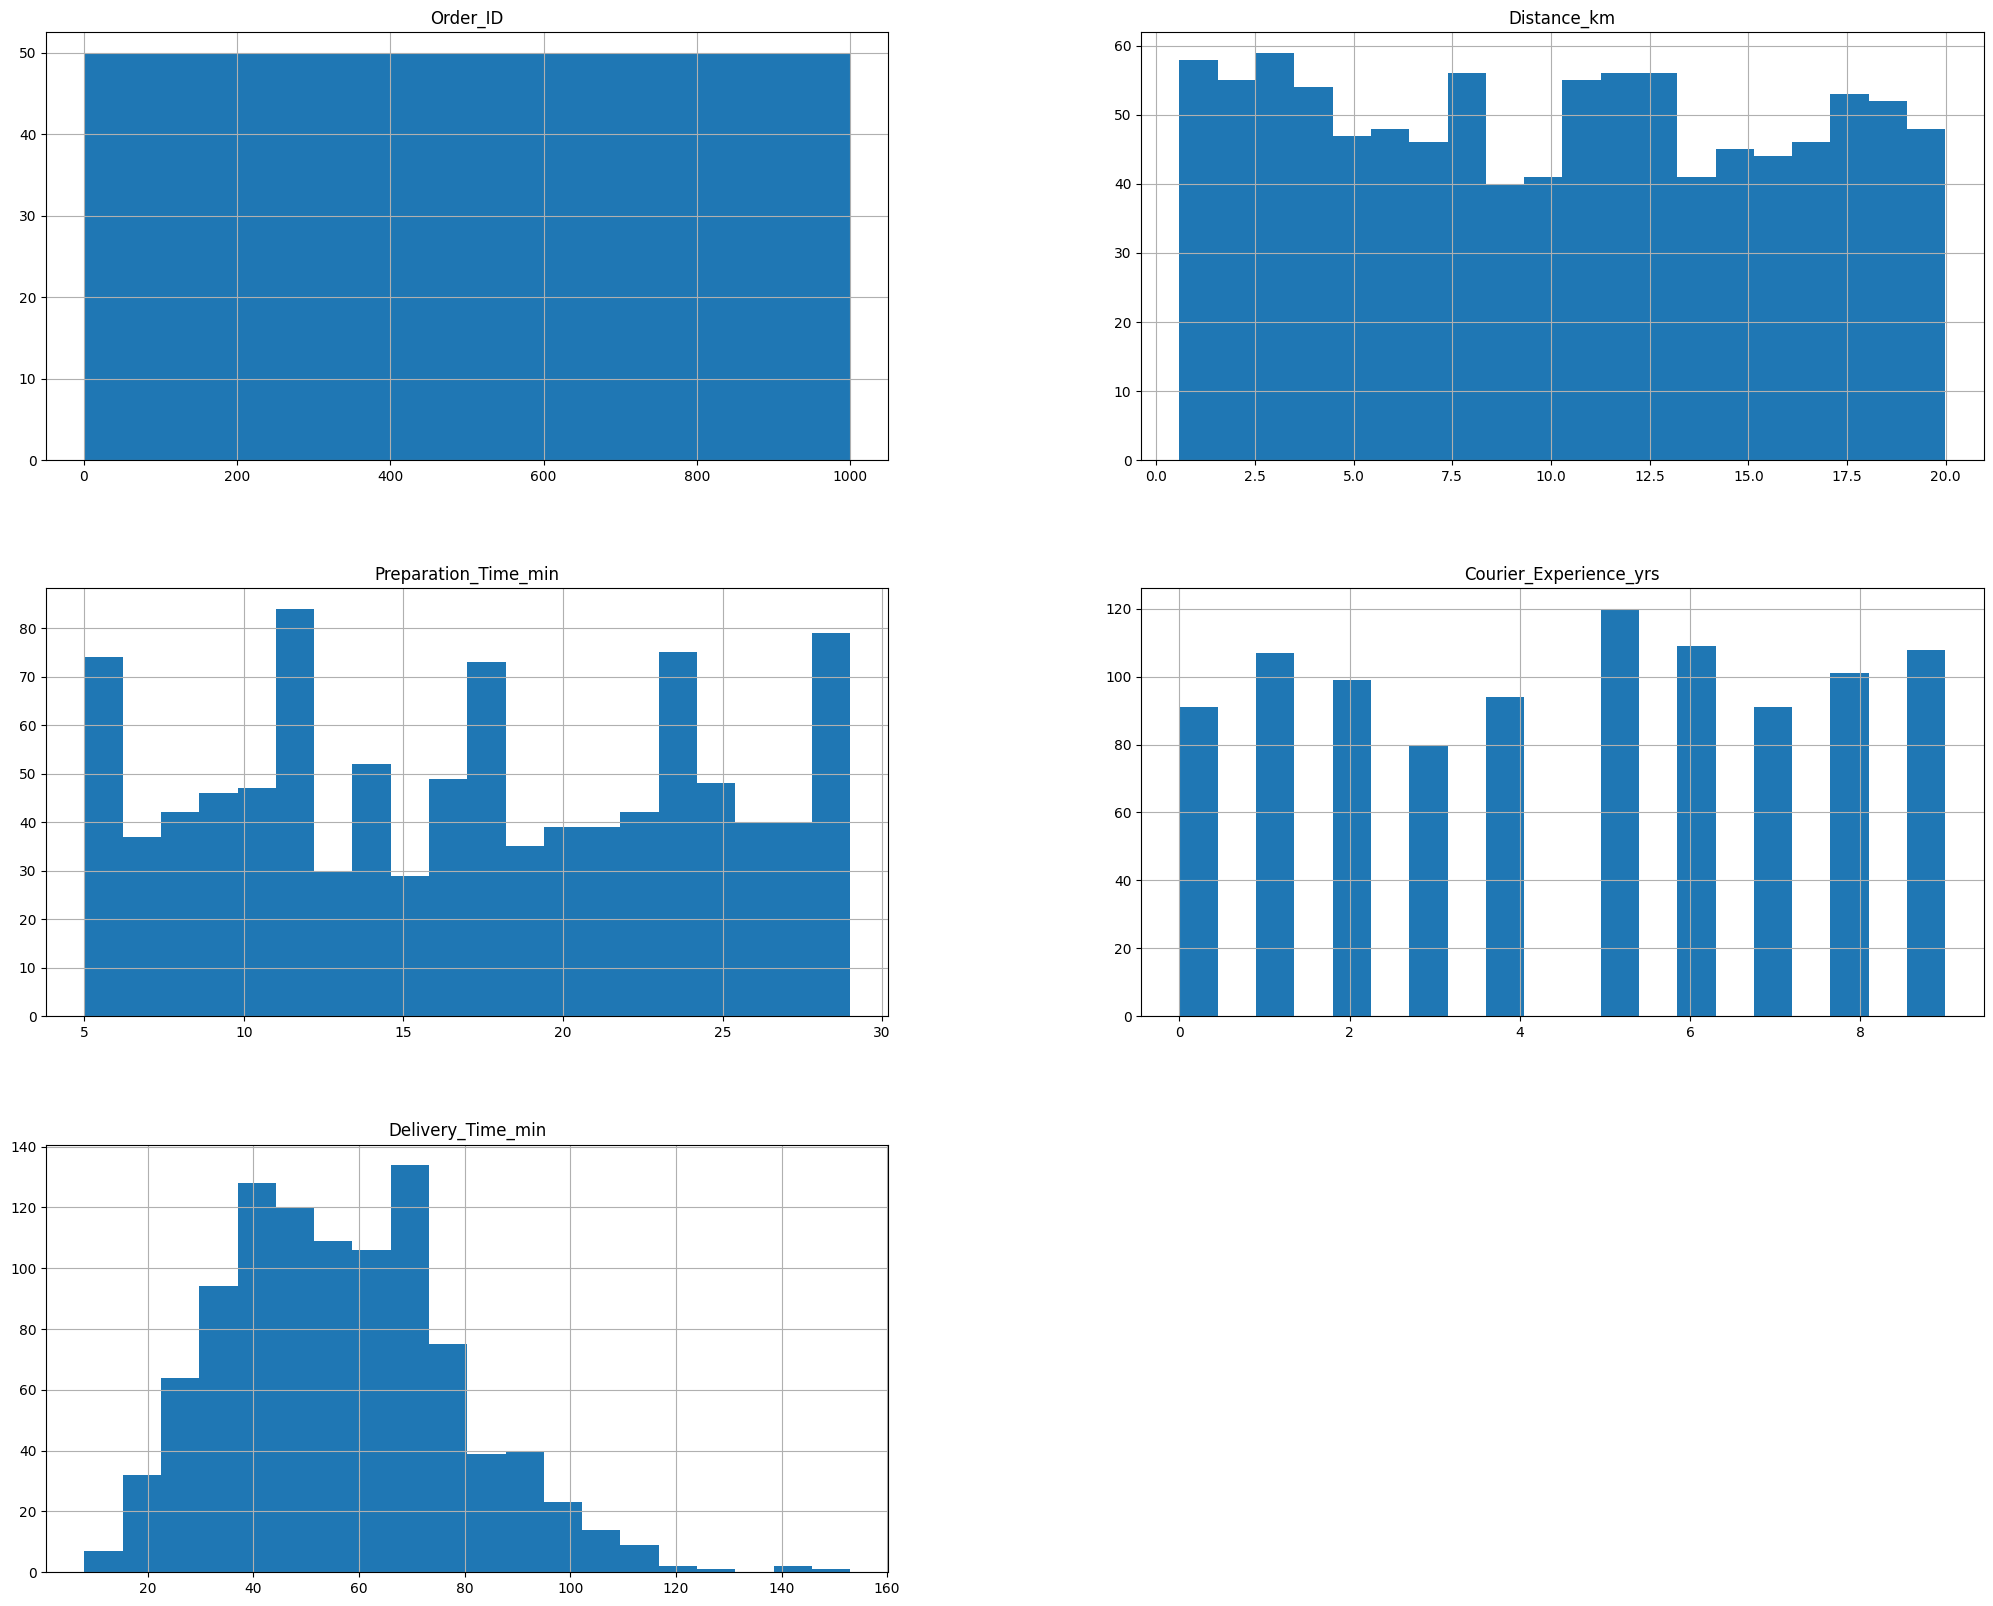

In [ ]:
time.hist(bins=20, figsize=(25, 20))

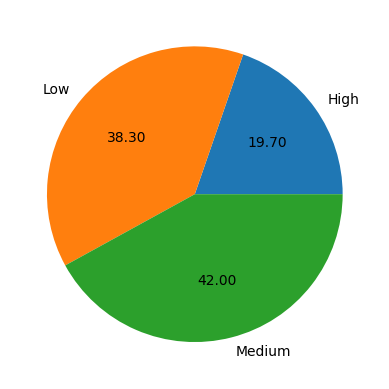

<Axes: >

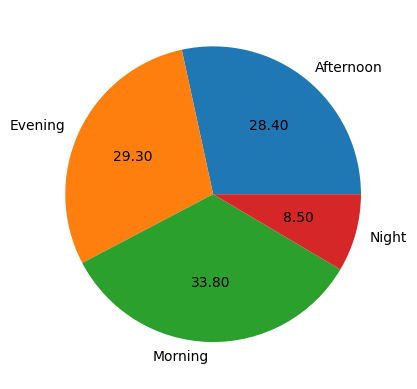

In [ ]:
time.groupby('Traffic_Level').size().plot(kind='pie', autopct='%.2f')
plt.show()
time.groupby('Time_of_Day').size().plot(kind='pie', autopct='%.2f')

In [ ]:
time_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']
traff = ['Low', 'Medium','High']
time_ordin_enc = OrdinalEncoder(categories=[time_of_day])
traff_ordin_enc = OrdinalEncoder(categories=[traff])
time['Time_of_Day'] = time_ordin_enc.fit_transform(time[['Time_of_Day']])
time['Traffic_Level'] = traff_ordin_enc.fit_transform(time[['Traffic_Level']])
time.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,0.0,1.0,Scooter,12,1.0,43
1,738,16.42,Clear,1.0,2.0,Bike,20,2.0,84
2,741,9.52,Foggy,0.0,3.0,Scooter,28,1.0,59
3,661,7.44,Rainy,1.0,1.0,Scooter,5,1.0,37
4,412,19.03,Clear,0.0,0.0,Bike,16,5.0,68


In [ ]:
time = pd.get_dummies(time, columns=['Weather',  'Vehicle_Type'], drop_first=True)
time.head()

,Order_ID,Distance_km,Traffic_Level,Time_of_Day,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,0.0,1.0,12,1.0,43,False,False,False,True,False,True
1,738,16.42,1.0,2.0,20,2.0,84,False,False,False,False,False,False
2,741,9.52,0.0,3.0,28,1.0,59,True,False,False,False,False,True
3,661,7.44,1.0,1.0,5,1.0,37,False,True,False,False,False,True
4,412,19.03,0.0,0.0,16,5.0,68,False,False,False,False,False,False
